**BUILDING A LINEAR REGRESSION MODEL TO PREDICT THE SALES BASED ON THE TV ADVERTISING**
>using sklearn package and manual computation.

IMPORTING DATASET

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

DATA PREPROCESSING

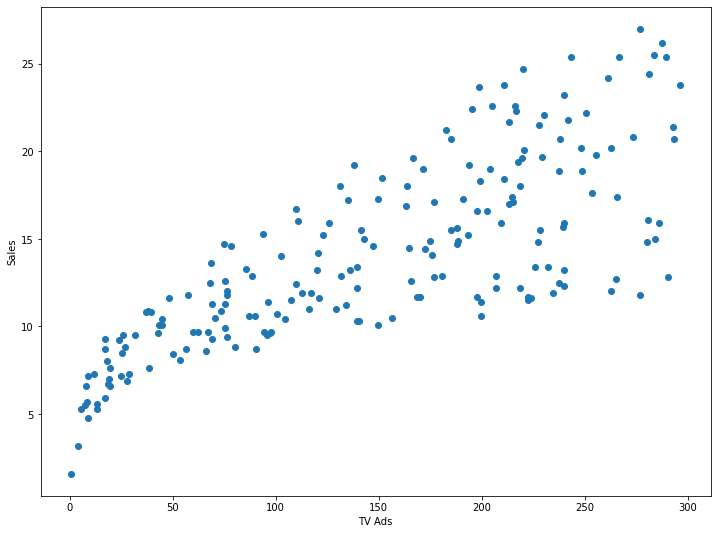

In [5]:
data = pd.read_csv('Advertising.csv')
X = data.iloc[:, 1]
Y = data.iloc[:, 4]
plt.scatter(X, Y)
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.show()

MODEL BUILDING

In [9]:
m = 0
c = 0
L = 0.00001  # The learning Rate
epochs = 50  # The number of iterations to perform gradient descent
n = float(len(X)) # Number of elements in X
 
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
 
print (m, c)

0.08323873042694489 0.0022036485248894387


MAKING PREDICTIONS

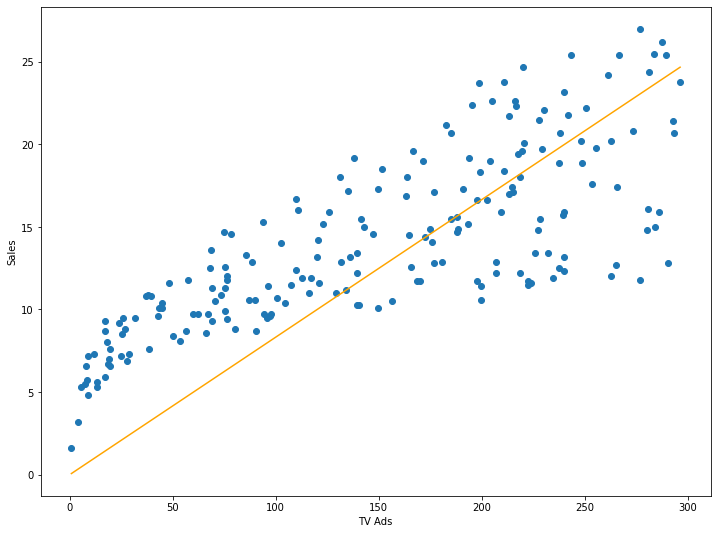

In [10]:
#Making predictions with the new m and c
ypred = m*X + c

#Plot the data with the regression line and predicted value points
plt.scatter(X, Y)
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot([min(X), max(X)], [min(ypred), max(ypred)], color='orange') #regression line
plt.show()

**LINEAR MODEL THROUGH SKLEARN**

In [13]:
dt = pd.read_csv('Advertising.csv', index_col=0)
dt.pop('Radio')
dt.pop('Newspaper')
dt.head()

,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


BUILDING FITTED MODEL

In [14]:
lm1 = smf.ols(formula='Sales ~ TV', data=dt).fit()
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [15]:
feature_cols = ['TV']
X = dt[feature_cols]
y = dt.Sales

#Instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

#Print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127695
[0.04753664]


CREATION OF PAIRPLOT

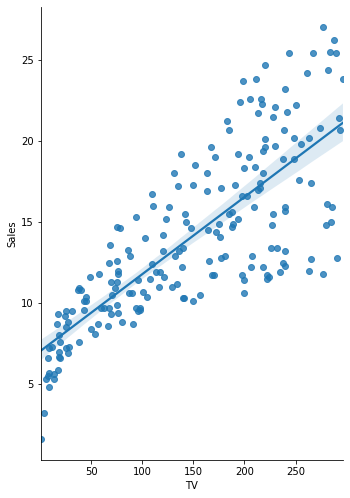

In [16]:
sns.pairplot(dt, x_vars=['TV'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

DATA PREPROCESSING

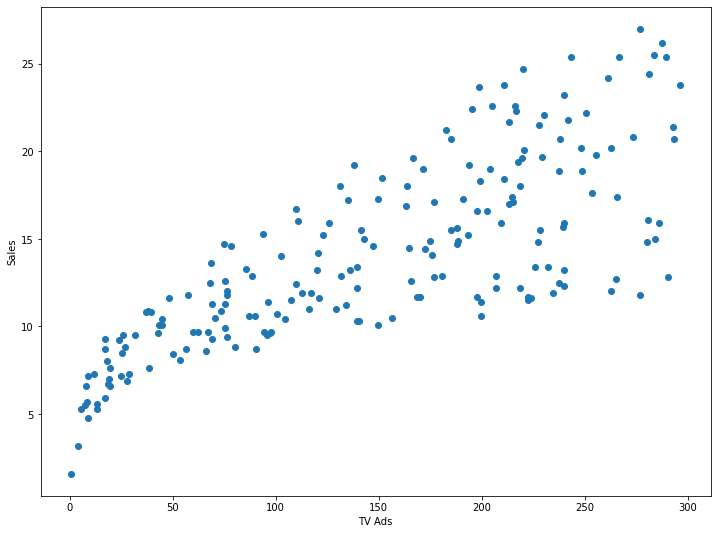

In [17]:
XX = data['TV'] 
YY = data['Sales']
plt.scatter(X, Y)
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.show()

MAKING PREDICTIONS

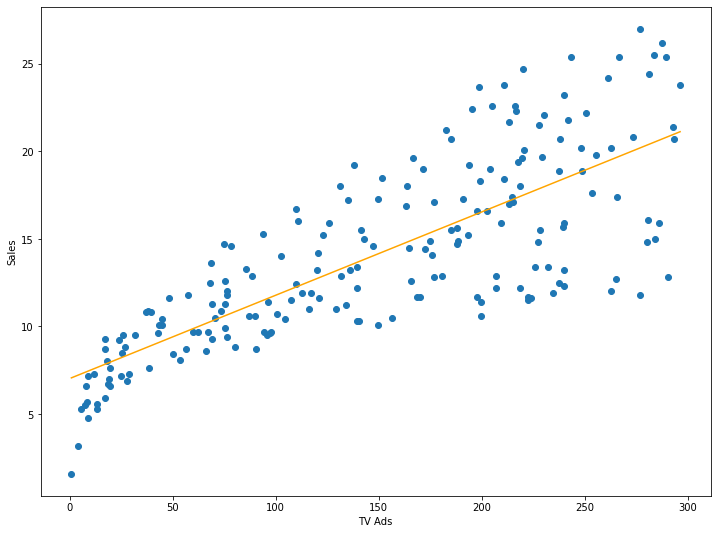

In [18]:
Y_predx = lm2.coef_*XX +  lm2.intercept_
#Y_predx = 0.04753664*XX +  7.032593549127695


plt.scatter(XX, YY)
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot([min(XX), max(XX)], [min(Y_predx), max(Y_predx)], color='orange')  # regression line
plt.show()